In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<font size='6' color='red'><b>ch04. tensorflow_v1 tensor객체흐름</b></font>
# 1. tensorflow v2.xx에서 v1 사용하기

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # tensorflow v2 비활성화하고 v1 활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- tensorflow(tensor 객체의 흐름)을 사용하는 수치 계산 라이브러리
- 그래프는 node(연산)와 edge로 구성
- tf.Session()을 이용해서 실행 환경
- sess.run()을 통해서 실행 결과를 확인

In [3]:
# 1단계 : tensor 정의
node1 = tf.constant('Hello, Tensorflow')
# 2단계 : 세션 (연산을 실행하는 환경) 생성
sess = tf.Session()
# 3단계 : 실제 실행 및 출력
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [6]:
# 간단한 연산 tensor 그래프
# 1. 그래프 정의
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
# 2. 세션생성
sess = tf.Session()
# 3. 세션실행 
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [7]:
# 타입변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float16)
sess = tf.Session()
print(sess.run([node1, node2]))

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float16)]


In [11]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data)
sess = tf.Session()
print(sess.run(m))

2.5


In [15]:
# tf.random_normal([size]) : 평균이 0이고 표준편차가 1인 난수 size개 발생
w = tf.random_normal([5])
sess = tf.Session()
sess.run(w)

array([-0.76787317, -1.7493707 , -0.7459102 , -0.06121097, -0.16678952],
      dtype=float32)

In [17]:
# 변수 노드
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(w)

array([0.33758157], dtype=float32)

# 2. tensorflow v1을 이용한 회귀분석

## 2.1 독립변수 x가 1개, 타겟(종속)변수 y가 1개

In [20]:
# tensor 그래프 정의
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# 예측값 Hat, Hypothesis
H = W*x+b
# cost function (손실함수 : mse)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W,b를 찾는것
cost 함수는 2차함수이므로 곡선 그래프, 곡선위 미분값이 0이 되는 방향
(경사하강법 GradientDescent)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 세션 생성
sess = tf.Session()
# W, b 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학스 (v2의 fit과 동일)
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if not step%200:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))

0번째 cost:8.504267692565918, W:[0.35742226], b:[-0.25779563]
200번째 cost:0.03674238547682762, W:[1.2220926], b:[0.49513105]
400번째 cost:0.014030060730874538, W:[1.1372399], b:[0.6880214]
600번째 cost:0.00535736745223403, W:[1.084806], b:[0.8072161]
800번째 cost:0.0020456977654248476, W:[1.0524049], b:[0.88087136]
1000번째 cost:0.0007811398827470839, W:[1.0323828], b:[0.9263862]
1200번째 cost:0.00029827968683093786, W:[1.0200107], b:[0.95451087]
1400번째 cost:0.00011389714200049639, W:[1.0123652], b:[0.9718906]
1600번째 cost:4.3492676923051476e-05, W:[1.0076411], b:[0.98262995]
1800번째 cost:1.6608388250460848e-05, W:[1.0047219], b:[0.98926616]
2000번째 cost:6.3412021518161055e-06, W:[1.0029178], b:[0.9933674]
2200번째 cost:2.4219004899350693e-06, W:[1.0018032], b:[0.99590105]
2400번째 cost:9.253394637198653e-07, W:[1.0011145], b:[0.9974663]
2600번째 cost:3.538461612606625e-07, W:[1.0006895], b:[0.99843335]
2800번째 cost:1.3547531807489577e-07, W:[1.0004263], b:[0.9990306]
3000번째 cost:5.193292906824354e-08, W:[1.

In [22]:
# 최종적으로 나온 회귀식 H=W*x+b
W_, b_ = sess.run([W,b])
W_, b_

(array([1.0000087], dtype=float32), array([0.9999811], dtype=float32))

In [23]:
def predict(x):
    return W_[0]*x + b_[0]

predict(5)

6.000024616718292

## 2.2 predict를 위한 placeholder 이용
- placeholder : 외부에서 데이터를 입력받을 수 잇는 노드

In [25]:
x = tf.placeholder(dtype=tf.float32)
H = 1*x+1
sess = tf.Session()
sess.run([x, H], feed_dict={x : np.array([40, 50])})

[array([40., 50.], dtype=float32), array([41., 51.], dtype=float32)]

In [26]:
# tensor 그래프 정의
x_data = np.array([1,2,3])
y_data = np.array([2,3,4])
# placeholder 설정 (x,y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight와 bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# 예측값 Hat, Hypothesis
H = W*x+b
# cost function (손실함수 : mse)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W,b를 찾는것
cost 함수는 2차함수이므로 곡선 그래프, 곡선위 미분값이 0이 되는 방향
(경사하강법 GradientDescent)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 세션 생성
sess = tf.Session()
# W, b 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학스 (v2의 fit과 동일)
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x: x_data, y: y_data})
    if not step%200:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))

0번째 cost:11.58001708984375, W:[0.42380363], b:[-0.8450284]
200번째 cost:0.09787965565919876, W:[1.3624907], b:[0.17597345]
400번째 cost:0.03737518563866615, W:[1.2239969], b:[0.49080205]
600번째 cost:0.01427167933434248, W:[1.1384166], b:[0.6853464]
800번째 cost:0.005449643824249506, W:[1.0855331], b:[0.80556315]
1000번째 cost:0.0020809376146644354, W:[1.0528542], b:[0.87985]
1200번째 cost:0.0007945997640490532, W:[1.0326607], b:[0.92575455]
1400번째 cost:0.0003034271067008376, W:[1.0201826], b:[0.9541204]
1600번째 cost:0.0001158596933237277, W:[1.0124713], b:[0.97164965]
1800번째 cost:4.424045255291276e-05, W:[1.0077066], b:[0.982481]
2000번째 cost:1.6894557120394893e-05, W:[1.0047623], b:[0.9891742]
2200번째 cost:6.4512682911299635e-06, W:[1.002943], b:[0.9933099]
2400번째 cost:2.4638036393298535e-06, W:[1.0018188], b:[0.99586564]
2600번째 cost:9.412224812876957e-07, W:[1.0011243], b:[0.9974445]
2800번째 cost:3.5978419532511907e-07, W:[1.0006952], b:[0.9984201]
3000번째 cost:1.3760431727405376e-07, W:[1.0004299],

In [29]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([6.0000243], dtype=float32)

## 2.3 scale이 다른 데이터들의 회귀분석 구현 (scale 조정 x)

In [34]:
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
#placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# 예측치
H = W*x + b
# cost (손실함수)
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성 및 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={x: x_data, y: y_data})
    if not step%200:
        print("{}번째 cost:{}".format(step+1, cost_val))

201번째 cost:79.26795959472656
401번째 cost:79.15126037597656
601번째 cost:79.14054107666016
801번째 cost:79.13957214355469
1001번째 cost:79.13945007324219
1201번째 cost:79.13948059082031
1401번째 cost:79.13945007324219
1601번째 cost:79.13945770263672
1801번째 cost:79.13946533203125
2001번째 cost:79.13944244384766
2201번째 cost:79.13944244384766
2401번째 cost:79.13946533203125
2601번째 cost:79.13946533203125
2801번째 cost:79.13946533203125
3001번째 cost:79.13946533203125
3201번째 cost:79.13946533203125
3401번째 cost:79.13946533203125
3601번째 cost:79.13946533203125
3801번째 cost:79.13946533203125
4001번째 cost:79.13946533203125
4201번째 cost:79.13946533203125
4401번째 cost:79.13946533203125
4601번째 cost:79.13946533203125
4801번째 cost:79.13946533203125
5001번째 cost:79.13946533203125
5201번째 cost:79.13946533203125
5401번째 cost:79.13946533203125
5601번째 cost:79.13946533203125
5801번째 cost:79.13946533203125
6001번째 cost:79.13946533203125


## 2.4 scale이 다른 데이터들의 회귀분석 구현 (scale 조정O)
### scale 조정방법: 모든 데이터를 일정범위내로 조정
- normalization(정규화) : 모든 데이터를 0~1 사이로 조정
```
                          X - Xmin
normalization = ━━━━━━━━━━━━━
                          Xmax - Xmin
```
    - 위의 식보다 라이브러리 추천 (sklearn.preprocessing.MinMaxScaler)
- standardization(표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
```
                          X - Xmean
standardization = ━━━━━━━━━━━━━
                          Xstd(표준편차)
```
    - 위의 식보다 라이브러리 추천 (sklearn.preprocessing.StandardScaler)

In [37]:
# 라이브러리를 이용하지 않고 정규화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
# x_data_min(), x_data.max(), x_data.mean(), x_data.std()
norm_scaled_x_data = (x_data - x_data.min()) / (x_data.max()-x_data.min())
norm_scaled_y_data = (y_data - y_data.min()) / (y_data.max()-y_data.min())
norm_scaled_x_data, norm_scaled_y_data

(array([0.        , 0.11111111, 0.44444444, 0.77777778, 1.        ]),
 array([0.        , 0.11111111, 0.7       , 0.83333333, 1.        ]))

In [40]:
# 라이브러리를 이용한 정규화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1,1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() #독립변수 x를 정규화시킬 객체
norm_scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler() # 종속(타겟)변수 y를 정규화시킬 객체
norm_scaled_y_data = scaler_y.fit_transform(y_data)
# 스케일객체를 따로 만드는 이유는 나중에 역계산을 할때 필요하기 때문이다
norm_scaled_x_data, norm_scaled_y_data

array([[0.        ],
       [0.11111111],
       [0.7       ],
       [0.83333333],
       [1.        ]])

In [44]:
# 라이브러리를 이용하지 않고 표준화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
stan_scaled_x_data = (x_data - x_data.mean()) / x_data.std()
stan_scaled_y_data = (y_data - y_data.mean()) / y_data.std()
np.column_stack([x_data, norm_scaled_x_data, stan_scaled_x_data])

array([[ 1.        ,  0.        , -1.22474487],
       [ 2.        ,  0.11111111, -0.93313895],
       [ 5.        ,  0.44444444, -0.05832118],
       [ 8.        ,  0.77777778,  0.81649658],
       [10.        ,  1.        ,  1.39970842]])

In [45]:
np.column_stack([y_data, norm_scaled_y_data, stan_scaled_y_data])

array([[ 5.        ,  0.        , -1.32373476],
       [15.        ,  0.11111111, -1.04563922],
       [68.        ,  0.7       ,  0.42826713],
       [80.        ,  0.83333333,  0.76198177],
       [95.        ,  1.        ,  1.17912508]])

In [47]:
# x 라이브러리를 사용하여 표준화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1,1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
stan_scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = StandardScaler()
stan_scaled_y_data = scaler_y.fit_transform(y_data)
stan_scaled_x_data, stan_scaled_y_data

(array([[-1.22474487],
        [-0.93313895],
        [-0.05832118],
        [ 0.81649658],
        [ 1.39970842]]),
 array([[-1.32373476],
        [-1.04563922],
        [ 0.42826713],
        [ 0.76198177],
        [ 1.17912508]]))

In [48]:
#placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# 예측치
H = W*x + b
# cost (손실함수)
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성 및 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={x:norm_scaled_x_data, y:norm_scaled_y_data})
    if not step%200:
        print("{}번째 cost:{}".format(step+1, cost_val))

201번째 cost:0.05119568109512329
401번째 cost:0.026062313467264175
601번째 cost:0.016179820522665977
801번째 cost:0.012291904538869858
1001번째 cost:0.010762336663901806
1201번째 cost:0.010160582140088081
1401번째 cost:0.009923848323523998
1601번째 cost:0.009830708615481853
1801번째 cost:0.009794066660106182
2001번째 cost:0.009779653511941433
2201번째 cost:0.0097739789634943
2401번째 cost:0.009771747514605522
2601번째 cost:0.009770870208740234
2801번째 cost:0.009770524688065052
3001번째 cost:0.009770391508936882
3201번째 cost:0.009770339354872704
3401번째 cost:0.009770316071808338
3601번째 cost:0.009770303964614868
3801번째 cost:0.009770307689905167
4001번째 cost:0.009770301170647144
4201번째 cost:0.009770303033292294
4401번째 cost:0.009770305827260017
4601번째 cost:0.009770303033292294
4801번째 cost:0.009770302101969719
5001번째 cost:0.009770302101969719
5201번째 cost:0.009770302101969719
5401번째 cost:0.009770302101969719
5601번째 cost:0.009770302101969719
5801번째 cost:0.009770302101969719
6001번째 cost:0.009770302101969719


## 2.5 독립변수 x가 3개, 타겟(종속)변수 y가 1개
- 교안 28pg

In [21]:
# dataset
X_data = np.array([[73, 80, 75], # 학습시에는 X에 5행 3열, 예측시 ?행 1열
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]])
y_data = np.array([152, 185, 180, 196, 142]).reshape(-1,1)
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# sess = tf.Session()
# sess.run(X, feed_dict={X:np.array([[30, 40, 50]])})
# weight & bias (weight는 3개, bias는 1개)
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
# H = X@W + b # 행렬곱
H = tf.matmul(X, W) + b
# cost : mse
cost = tf.reduce_mean(tf.square(H - y))
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# session 생성과 variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for i in range(1, 10001):
    _, cost_val = sess.run([train,cost], feed_dict={X: X_data, y:y_data})
    if i % 1000 == 1:
        print(f"{i}번째 cost : {cost_val}")
print(f"최종 cost : {cost_val}")


1번째 cost : 227.7257080078125
1001번째 cost : 12.944745063781738
2001번째 cost : 7.675721645355225
3001번째 cost : 4.607175350189209
4001번째 cost : 2.818556070327759
5001번째 cost : 1.7745168209075928
6001번째 cost : 1.1637067794799805
7001번째 cost : 0.8050330877304077
8001번째 cost : 0.5931608080863953
9001번째 cost : 0.4668298661708832
최종 cost : 0.3904404044151306


In [22]:
# 예측
input_data = np.array([[73, 80, 77], 
                       [73, 80, 72]])
sess.run(H, feed_dict={X:input_data})

array([[153.21764],
       [149.34888]], dtype=float32)

In [23]:
input_data = np.array([[73, 80, 77]])
sess.run(H, feed_dict={X:input_data})

array([[153.21764]], dtype=float32)

In [28]:
from sklearn.preprocessing import StandardScaler
# scale 조정하여 학습하고 예측하기
X_data = np.array([[73, 80, 75], # 학습시에는 X에 5행 3열, 예측시 ?행 1열
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]])
y_data = np.array([152, 185, 180, 196, 142]).reshape(-1,1)
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaled_x_data = scaler_x.fit_transform(X_data)
scaled_y_data = scaler_y.fit_transform(y_data)

# weight & bias (weight는 3개, bias는 1개)
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
# H = X@W + b # 행렬곱
H = tf.matmul(X, W) + b
# cost : mse
cost = tf.reduce_mean(tf.square(H - y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session 생성과 variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for i in range(1, 10001):
    _, cost_val = sess.run([train,cost], feed_dict={X: scaled_x_data, y:scaled_y_data})
    if i % 1000 == 1:
        print(f"{i}번째 cost : {cost_val}")
print(f"최종 cost : {cost_val}")


1번째 cost : 9.78455638885498
1001번째 cost : 0.0021119220182299614
2001번째 cost : 0.0011908214073628187
3001번째 cost : 0.001103157876059413
4001번째 cost : 0.0010293172672390938
5001번째 cost : 0.0009619016200304031
6001번째 cost : 0.000900302198715508
7001번째 cost : 0.0008440188830718398
8001번째 cost : 0.0007925944519229233
9001번째 cost : 0.0007456039311364293
최종 cost : 0.0007027111714705825


In [31]:
# 예측
input_data = np.array([[73, 80, 77], 
                       [73, 80, 72]])
hat = sess.run(H, feed_dict={X:scaler_x.transform(input_data)})
predict_data = scaler_y.inverse_transform(hat)
print(predict_data)

[[154.67287]
 [147.65692]]


In [32]:
# 예측
input_data = np.array([[73, 80, 77]])
hat = sess.run(H, feed_dict={X:scaler_x.transform(input_data)})
predict_data = scaler_y.inverse_transform(hat)
print(predict_data)

[[154.67287]]


# 3. Logistic regression == Binary classification
- 로지스틱 회귀분석 = 이진분류분석
- 기존의 회귀분석과 loss function이 달라짐

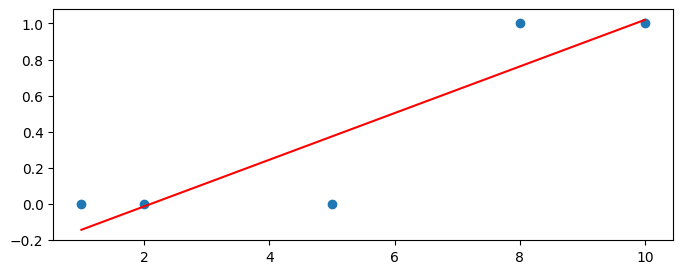

In [34]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
x = np.array([10, 8, 5, 2, 1])
y = np.array([1, 1, 0, 0, 0])
lm = stats.linregress(x,y) #lm[0]:기울기(w, slope)와 lm[1]:절편(b, intercept)
H = lm[0] * x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H, 'r')
plt.show()

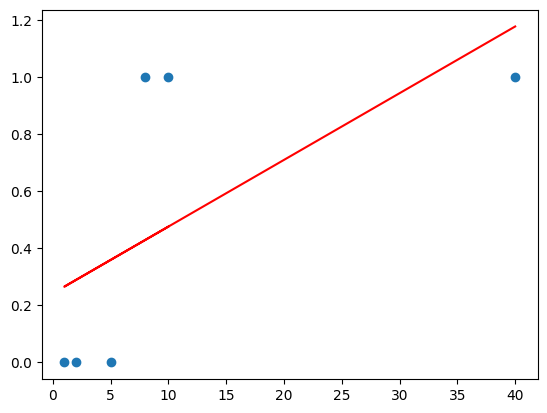

In [35]:
x = np.array([10, 8, 5, 2, 1, 40])
y = np.array([1, 1, 0, 0, 0, 1])
lm = stats.linregress(x,y) #lm[0]:기울기(w, slope)와 lm[1]:절편(b, intercept)
H = lm[0] * x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H, 'r')
plt.show()

In [42]:
# 교안 46p
x_data = np.array([[10, 0], 
                   [8, 1], 
                   [3, 3], 
                   [2, 3], 
                   [5, 1], 
                   [2, 0], 
                   [1, 0]])
y_data = np.array([1, 1, 1, 1, 0, 0, 0]).reshape(-1,1)
#x, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립(입력)변수 2개 -> 타겟(출력)변수 1개인 weight & bias
W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b # X@w + b : 시그모이드 활성화 함수 직전
H = tf.sigmoid(logits)
# MSE의 경우 sigmoid 활성화 함수를 입히면 MSE의 값이 엄청 작아지기에 (모든 코스트가 0~1사이라 더해봤자 크지않다) gradient가 작아져서 학습이 제대로 이루어지지 않는다
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, y:y_data})
    if step%1000==1:
        print(f"{step}번째 cost는:{cost_val}")
print('최종 cost :', cost_val)

1번째 cost는:4.681258678436279
1001번째 cost는:0.14952264726161957
2001번째 cost는:0.10576456040143967
3001번째 cost는:0.08116396516561508
4001번째 cost는:0.06544466316699982
5001번째 cost는:0.054635219275951385
6001번째 cost는:0.04679476469755173
7001번째 cost는:0.04087088257074356
8001번째 cost는:0.03624897077679634
9001번째 cost는:0.03254847601056099
최종 cost : 0.029525192


In [53]:
# accuracy(정확도 : 얼마나 맞춰는지)
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data}))

모델의 정확도 : 1.0


# 4. XOR
- 교안 62pg

In [58]:
# dataset
x_data = np.array([[0, 0], 
                   [0, 1], 
                   [1, 0], 
                   [1, 1]])
y_data = np.array([0, 1, 1, 0]).reshape(-1,1)
# X & y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 입력 2개 => 출력 1개인 W & b
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b # X@w + b : 시그모이드 활성화 함수 직전
H = tf.sigmoid(logits)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, y:y_data})
    if step%1000==1:
        print(f"{step}번째 cost는:{cost_val}")
print('최종 cost :', cost_val)

1번째 cost는:0.9620028734207153
1001번째 cost는:0.6931471824645996
2001번째 cost는:0.6931471824645996
3001번째 cost는:0.6931471824645996
4001번째 cost는:0.6931471824645996
5001번째 cost는:0.6931471824645996
최종 cost : 0.6931472


In [59]:
# accuracy(정확도 : 얼마나 맞춰는지)
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data}))

모델의 정확도 : 0.75


# 5. Deep Learning : XOR
- X2 => 4 => 1

In [69]:
# data set
x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0], 
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X & y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1 : 입력2 -> 출력 4인 W & b
W1 = tf.Variable(tf.random_normal([2, 4]))
b1 = tf.Variable(tf.random_normal([4]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
# layer2 : 입력 4 -> 출력 1인 W & b
W2 = tf.Variable(tf.random_normal([4, 1]))
b2 = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)
# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%1000==1:
        print("{}번째 cost:{}".format(step, cost_val))
print('최종 cost :', cost_val)

1번째 cost:0.8124556541442871
1001번째 cost:0.6940488815307617
2001번째 cost:0.6931532621383667
3001번째 cost:0.6931471824645996
4001번째 cost:0.6931471824645996
5001번째 cost:0.6931471824645996
6001번째 cost:0.6931471824645996
7001번째 cost:0.6931471824645996
8001번째 cost:0.6931471824645996
9001번째 cost:0.6931471824645996
최종 cost : 0.6931472


In [70]:
# accuracy(정확도 : 얼마나 맞춰는지)
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data}))

모델의 정확도 : 0.5


## layer층을 X2 => 10 => 20 => 10 => y1


In [71]:
# data set
x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0], 
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X & y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1 : 입력2 -> 출력 10인 W & b
W1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
# layer2 : 입력 10 -> 출력 20인 W & b
W2 = tf.Variable(tf.random_normal([10, 20]))
b2 = tf.Variable(tf.random_normal([20]))
layer2 = tf.nn.relu(tf.matmul(layer1, W2)+b2)
#layer3 : 입력 20 -> 출력 10인 W & b
W3 = tf.Variable(tf.random_normal([20, 10]))
b3 = tf.Variable(tf.random_normal([10]))
layer3 = tf.nn.relu(tf.matmul(layer2, W3)+b3)
#layer4 : 입력 10 -> 출력 1인 W & b
W4 = tf.Variable(tf.random_normal([10, 1]))
b4 = tf.Variable(tf.random_normal([1]))

# Hypothesis
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)
# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%1000==1:
        print("{}번째 cost:{}".format(step, cost_val))
print('최종 cost :', cost_val)

1번째 cost:0.8859943151473999
1001번째 cost:0.0022812820971012115
2001번째 cost:0.0010584084084257483
3001번째 cost:0.0006751514738425612
4001번째 cost:0.0004889634437859058
5001번째 cost:0.0003823716542683542
6001번째 cost:0.00031330983620136976
7001번째 cost:0.00026442622765898705
8001번째 cost:0.00022810438531450927
9001번째 cost:0.00020012915774714202
최종 cost : 0.00017797027


In [72]:
# accuracy(정확도 : 얼마나 맞춰는지)
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data}))

모델의 정확도 : 1.0
